In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#turns off scientific notations
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df=pd.read_csv('state_NY_actions_taken.csv')
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,nan,nan,nan,6065,27.55,126600,90,2164,4750,36
1,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,nan,nan,nan,4384,12.02,126600,122,1319,1479,45
2,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,nan,nan,nan,8488,40.34,126600,74,1943,2911,37
3,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,nan,nan,nan,6364,4.98,77600,142,1802,2544,61
4,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,nan,nan,nan,7401,17.97,77600,213,2519,2759,32


In [6]:
df.shape#checking shape

(182272, 99)

In [7]:
null_val=df.isna().sum()/len(df)*100
null_val

activity_year                       0.00
lei                                 0.00
derived_msa-md                      0.00
state_code                          0.00
county_code                         0.61
                                    ... 
ffiec_msa_md_median_family_income   0.00
tract_to_msa_income_percentage      0.00
tract_owner_occupied_units          0.00
tract_one_to_four_family_homes      0.00
tract_median_age_of_housing_units   0.00
Length: 99, dtype: float64

In [8]:
null_val[null_val>0]

county_code                      0.61
census_tract                     0.74
conforming_loan_limit            0.23
loan_to_value_ratio             46.02
interest_rate                   58.07
rate_spread                     98.73
total_loan_costs                69.34
total_points_and_fees           98.73
origination_charges             67.81
discount_points                 87.68
lender_credits                  89.47
loan_term                        2.14
prepayment_penalty_term         92.80
intro_rate_period               79.42
property_value                   4.81
multifamily_affordable_units    98.68
income                          26.09
debt_to_income_ratio            45.42
applicant_ethnicity-1            0.11
applicant_ethnicity-2           97.62
applicant_ethnicity-3           99.95
applicant_ethnicity-4          100.00
applicant_ethnicity-5          100.00
co-applicant_ethnicity-1         0.02
co-applicant_ethnicity-2        99.27
co-applicant_ethnicity-3        99.98
co-applicant

*There are many columns with null values above 50%,Hence dropping those columns*

In [9]:
above_50=null_val[null_val>50].index

In [10]:
len(above_50)

34

In [11]:
df=df.drop(above_50,axis=1)

In [12]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7401,17.97,77600,213,2519,2759,32


**Note: The dataset consist of redundant columns mostly named as derived columns which are generalized form of the original columns.These columns must be romoved.**

In [13]:
#these two columns represent the same field.most derived columns are gathered from original ones.
df[['applicant_race-1','derived_race']]

,applicant_race-1,derived_race
0,7.00,Race Not Available
1,7.00,Race Not Available
2,7.00,Race Not Available
3,7.00,Race Not Available
4,7.00,Race Not Available
...,...,...
182267,7.00,Race Not Available
182268,7.00,Race Not Available
182269,5.00,White
182270,5.00,White


In [14]:
df['action_taken'].value_counts()

3    107630
6     74642
Name: action_taken, dtype: int64

In [15]:
pd.crosstab(df['applicant_race-1'],df['derived_race'])

derived_race,2 or more minority races,American Indian or Alaska Native,Asian,Black or African American,Joint,Native Hawaiian or Other Pacific Islander,Race Not Available,White
applicant_race-1,,,,,,,,
1.00,152,625,0,0,120,0,0,0
2.00,72,0,9213,0,356,0,0,0
3.00,68,0,0,11222,285,0,0,0
4.00,4,0,0,0,24,250,0,0
5.00,11,1,108,2,864,23,0,83635
6.00,0,0,0,0,0,0,22637,0
7.00,0,0,0,0,0,0,50285,0
21.00,4,0,875,0,14,0,0,0
22.00,0,0,395,0,8,0,0,0


From the above cross_tab the values 6 is 'information not provided' and 7 is 'not applicable' but they have been categorised as the same('race not available') in the derived_race.Hence dropping derived columns.

In [16]:
#dropping derived/unwanted/unique columns
df=df.drop(['activity_year','state_code','preapproval','derived_race','derived_ethnicity','derived_sex'
           ,'co-applicant_ethnicity_observed','applicant_ethnicity_observed','applicant_race_observed','co-applicant_race_observed','applicant_sex_observed','co-applicant_sex_observed'],axis=1)

In [17]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,loan_type,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,3,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,2,2,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,7401,17.97,77600,213,2519,2759,32


In [18]:
#derived_dwelling_category has the construction method information,can do feature extraction to drop construction method
#or assign proper labels for der_dwel_category
df[['derived_dwelling_category','construction_method']]

,derived_dwelling_category,construction_method
0,Single Family (1-4 Units):Site-Built,1
1,Single Family (1-4 Units):Site-Built,1
2,Single Family (1-4 Units):Site-Built,1
3,Single Family (1-4 Units):Site-Built,1
4,Single Family (1-4 Units):Site-Built,1
...,...,...
182267,Single Family (1-4 Units):Site-Built,1
182268,Single Family (1-4 Units):Site-Built,1
182269,Single Family (1-4 Units):Site-Built,1
182270,Single Family (1-4 Units):Site-Built,1


In [19]:
#loan_type and lien_status are derived as a single column.which columns should we drop?
df[['loan_type','lien_status','derived_loan_product_type']]

,loan_type,lien_status,derived_loan_product_type
0,3,1,VA:First Lien
1,3,1,VA:First Lien
2,2,1,FHA:First Lien
3,3,1,VA:First Lien
4,3,1,VA:First Lien
...,...,...,...
182267,2,1,FHA:First Lien
182268,2,1,FHA:First Lien
182269,1,1,Conventional:First Lien
182270,1,1,Conventional:First Lien


In [20]:
#dropping these columns for now
df=df.drop(['applicant_age_above_62','derived_loan_product_type','construction_method'],axis=1)
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_dwelling_category,action_taken,purchaser_type,loan_type,loan_purpose,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,Single Family (1-4 Units):Site-Built,6,0,3,31,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,Single Family (1-4 Units):Site-Built,6,2,2,31,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,7401,17.97,77600,213,2519,2759,32


In [21]:
df.columns

Index(['lei', 'derived_msa-md', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_dwelling_category', 'action_taken',
       'purchaser_type', 'loan_type', 'loan_purpose', 'lien_status',
       'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'hoepa_status', 'loan_term', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'co-applicant_ethnicity-1', 'applicant_race-1', 'co-applicant_race-1',
       'applicant_sex', 'co-applicant_sex', 'applicant_age',
       'co-applicant_age', 'submission_of_application',
       'initially_paya

In [22]:
num_cols=['tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units','loan_amount','income']
len(num_cols)

9

In [23]:
df[num_cols].dtypes

tract_population                       int64
tract_minority_population_percent    float64
ffiec_msa_md_median_family_income      int64
tract_to_msa_income_percentage         int64
tract_owner_occupied_units             int64
tract_one_to_four_family_homes         int64
tract_median_age_of_housing_units      int64
loan_amount                          float64
income                               float64
dtype: object

In [24]:
cat_cols=[]
for i in df.columns:
    if i not in num_cols:
        cat_cols.append(i)
len(cat_cols)

41

In [25]:
for i in cat_cols:
    df[i]=df[i].astype('object')

In [26]:
df[cat_cols].dtypes

lei                                         object
derived_msa-md                              object
county_code                                 object
census_tract                                object
conforming_loan_limit                       object
derived_dwelling_category                   object
action_taken                                object
purchaser_type                              object
loan_type                                   object
loan_purpose                                object
lien_status                                 object
reverse_mortgage                            object
open-end_line_of_credit                     object
business_or_commercial_purpose              object
loan_to_value_ratio                         object
hoepa_status                                object
loan_term                                   object
negative_amortization                       object
interest_only_payment                       object
balloon_payment                

**Understanding the heirarchy of columns 'derived_mas-md','county_code' and 'census_tract'**

![](https://www.census.gov/content/dam/Census/newsroom/blogs/2014/07/understanding-geographic-relationships-counties-places-tracts-and-more/geo1.jpg)

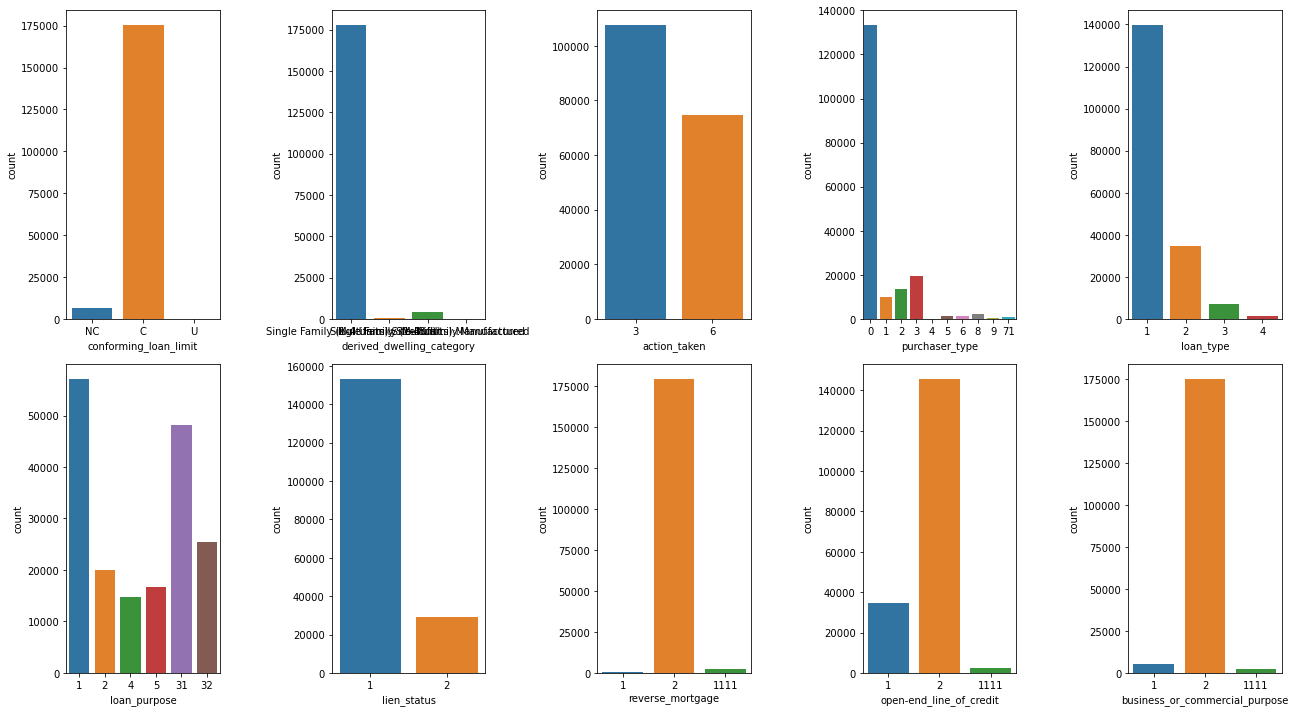

In [27]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(cat_cols[4:14],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [28]:
df['family-dwelling_type']=df['derived_dwelling_category'].replace({'Single Family (1-4 Units):Site-Built':'SFSB',
                                                                   'Single Family (1-4 Units):Manufactured':'SFM',
                                                                   'Multifamily:Site-Built':'MFSB',
                                                                   'Multifamily:Manufactured':'MFM'})
df=df.drop('derived_dwelling_category',axis=1)

In [29]:
df['action_taken']=df['action_taken'].replace({3:'denied',6:'approved'})
df['purchaser_type']=df['purchaser_type'].replace({0:'NA',1:'Fannie Mae',2:'Ginnie Mae',3:'Freddie Mac',
                                                   4:'Farmer Mac',5:'Private securitizer',6:'Commercial bank',
                                                   71:'finance company',72:'Life insurance company',8:'Affiliate institution',
                                                   9:'Others'})
df['loan_type']=df['loan_type'].replace({1:'Conventional',2:'FHA',3:'VA',4:'RHS'})
df['loan_purpose']=df['loan_purpose'].replace({1:'Home purchase',2:'Home improvement',31:'Refinancing',32:'Cash-out refinancing',
                                               4:'Other purpose',5:'NA'})
df['lien_status']=df['lien_status'].replace({1:'FL',2:'SL'})
df['reverse_mortgage']=df['reverse_mortgage'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['open-end_line_of_credit']=df['open-end_line_of_credit'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['business_or_commercial_purpose']=df['business_or_commercial_purpose'].replace({1:'Yes',2:'No',1111:'Exempt'})

In [30]:
df[df['loan_to_value_ratio']!='Exempt']['loan_to_value_ratio'].astype('float').describe()

count       96075.00
mean         1284.30
std        376392.97
min             0.01
25%            51.28
50%            71.43
75%            84.23
max     116666666.67
Name: loan_to_value_ratio, dtype: float64

In [31]:
lv_i=df[df['loan_to_value_ratio']=='Exempt'].index
df['loan_to_value_ratio']=pd.cut(df['loan_to_value_ratio'].replace({'Exempt':0}).astype('float'),bins=[0,25,50,75,100,116666668],
                      labels=['0-25%','25-50%','50-75%','75-100%','>100%']).astype('object')
for i in lv_i:
    df['loan_to_value_ratio'][i]='Exempt'
df['loan_to_value_ratio'].value_counts()

75-100%    36721
50-75%     31808
25-50%     15920
0-25%       7170
>100%       4456
Exempt      2310
Name: loan_to_value_ratio, dtype: int64

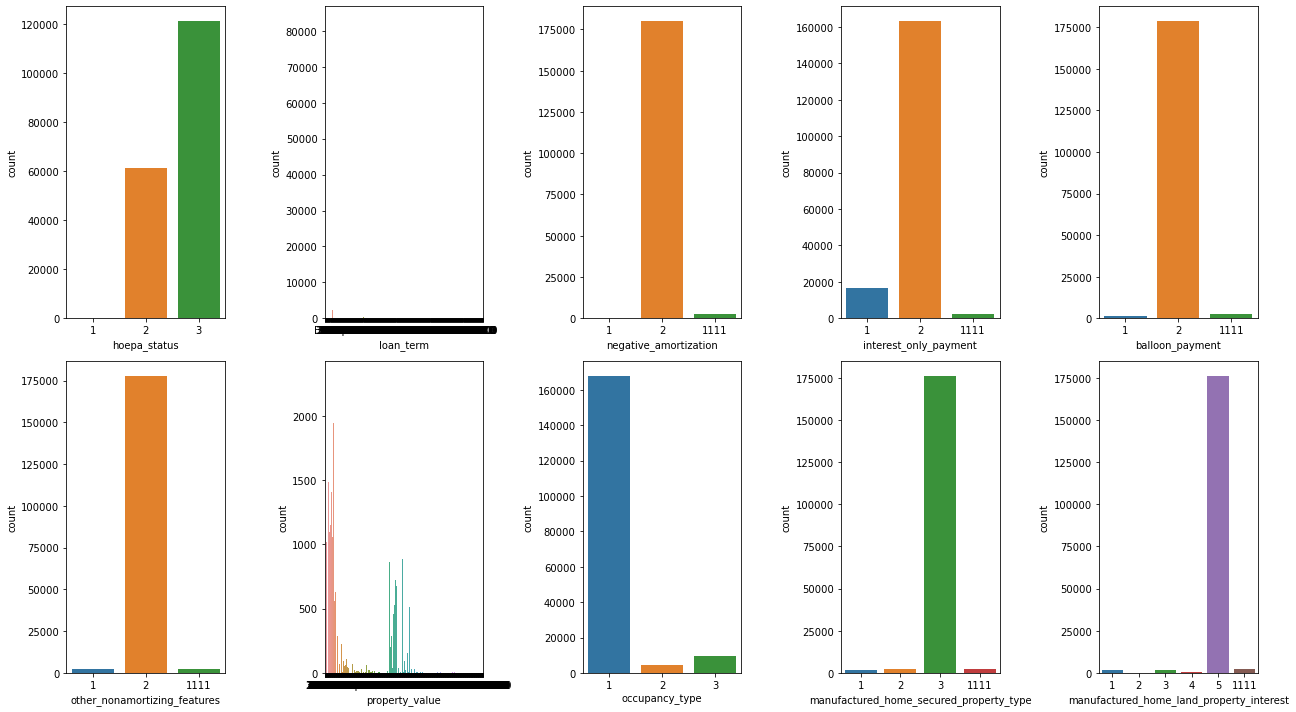

In [32]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(cat_cols[15:25],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [33]:
#hoepa_status indicates that whether the mortgage is high_cost mortgage or not,
df['high_cost_mortgage']=df['hoepa_status'].replace({1:'Yes',2:'No',3:'NA'})
df=df.drop('hoepa_status',axis=1)
df['negative_amortization']=df['negative_amortization'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['interest_only_payment']=df['interest_only_payment'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['balloon_payment']=df['balloon_payment'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['other_nonamortizing_features']=df['other_nonamortizing_features'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['occupancy_type']=df['occupancy_type'].replace({1:'Principal residence',2:'Second residence',3:'Investment property'})

In [34]:
df['loan_term']=df['loan_term'].replace({'Exempt':0})
df['loan_term']=df['loan_term'].astype('float')

In [35]:
df[df['property_value']!='Exempt']['property_value'].astype('float').describe()

count      171201.00
mean       577593.27
std       3666442.08
min          5000.00
25%        205000.00
50%        415000.00
75%        655000.00
max     900005000.00
Name: property_value, dtype: float64

In [36]:
pv_i=df[df['property_value']=='Exempt'].index
df['property_value']=pd.cut(df['property_value'].replace({'Exempt':0}).astype('float'),bins=[5000,100000,500000,1000000,900006000],
                      labels=['<100K','100K-500K','500K-1M','>1M']).astype('object')
for i in pv_i:
    df['property_value'][i]='Exempt'
df['property_value'].value_counts()

100K-500K    91623
500K-1M      52493
>1M          16153
<100K        10835
Exempt        2310
Name: property_value, dtype: int64

In [37]:
df=df.drop(['manufactured_home_secured_property_type','manufactured_home_land_property_interest'],axis=1)
df.shape

(182272, 48)

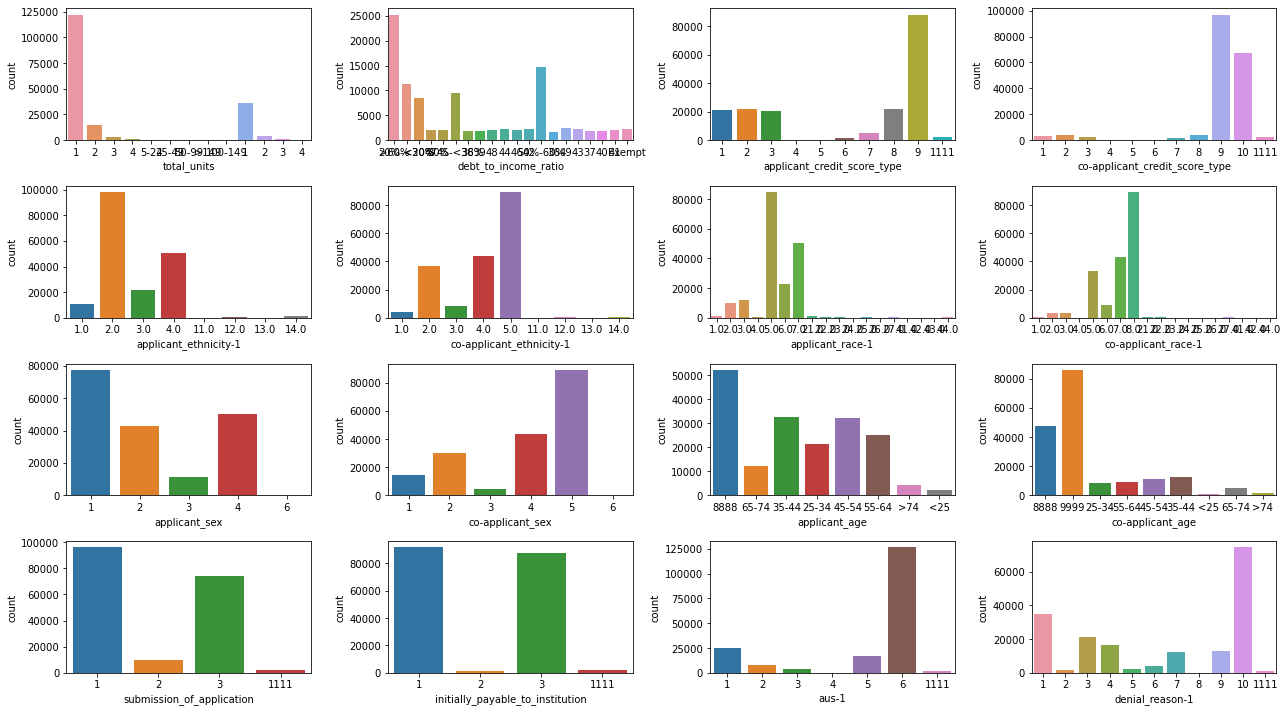

In [38]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(18,10))
for var,sub in zip(cat_cols[25:],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [39]:
df['applicant_credit_score_type']=df['applicant_credit_score_type'].replace({1:'EB 5.0',2:'EFI',
                                                                             3:'FICO 04',
                                                                             4:'FICO 98',5:'Vantage 2.0',
                                                                             6:'Vantage 3.0',7:'>1 scoring mode'
                                                                             ,8:'Others',9:'Not applicable',1111:'Exempt'})
df['co-applicant_credit_score_type']=df['co-applicant_credit_score_type'].replace({1:'EB 5.0',2:'EFI',
                                                                             3:'FICO 04',
                                                                             4:'FICO 98',5:'Vantage 2.0',
                                                                             6:'Vantage 3.0',7:'>1 scoring mode'
                                                                             ,8:'Others',9:'Not applicable',10:'No co-applicant',1111:'Exempt'})


In [40]:
df['applicant_race-1']=df['applicant_race-1'].replace({1:'American Indian',2:'Other Asian',21:'Asian Indian',22:'Chinese',23:'Filipino',
                                                       24:'Japanese',25:'Korean',26:'Vietnamese',27:'Other Asian',3:'Black',
                                                       4:'Hawaiian/Pacific',41:'Native Hawaiian',42:'Guamanian',43:'Samoan',
                                                       44:'Pacific',5:'White',6:'Not provided',7:'Not applicable'})
df['co-applicant_race-1']=df['co-applicant_race-1'].replace({1:'American Indian',2:'Other Asian',21:'Asian Indian',22:'Chinese',23:'Filipino',
                                                       24:'Japanese',25:'Korean',26:'Vietnamese',27:'Other Asian',3:'Black',
                                                       4:'Hawaiian/Pacific',41:'Native Hawaiian',42:'Guamanian',43:'Samoan',
                                                       44:'Pacific',5:'White',6:'Not provided',7:'Not applicable',8:'No co-applicant'})

In [41]:
df['applicant_ethnicity-1']=df['applicant_ethnicity-1'].replace({1:'Hisp or Lat',11:'Mexican',12:'Puerto Rican',13:'Cuban',
                                                                 14:'Other Hisp or Lat',2:'Not Hisp or Lat',3:'Not provided',
                                                                 4:'NA'})
df['co-applicant_ethnicity-1']=df['co-applicant_ethnicity-1'].replace({1:'Hisp or Lat',11:'Mexican',12:'Puerto Rican',13:'Cuban',
                                                                 14:'Other Hisp or Lat',2:'Not Hisp or Lat',3:'Not provided',
                                                                 4:'Not applicable',5:'No co-applicant'})                                                                 

In [42]:
df['applicant_sex']=df['applicant_sex'].replace({1:'Male',2:'Female',3:'Not provided',4:'NA',6:'Both'})
df['co-applicant_sex']=df['co-applicant_sex'].replace({1:'Male',2:'Female',3:'Not provided',4:'NA',6:'Both',5:'No co-applicant'})
df['applicant_age']=df['applicant_age'].replace({'8888':'Not applicable'})
df['co-applicant_age']=df['co-applicant_age'].replace({'8888':'Not applicable','9999':'No co-applicant'})
df['submission_of_application']=df['submission_of_application'].replace({1:'Yes',2:'No',3:'Not applicable',1111:'Exempt'})
df['initially_payable_to_institution']=df['initially_payable_to_institution'].replace({1:'Yes',2:'No',3:'Not applicable',1111:'Exempt'})
df['aus-1']=df['aus-1'].replace({1:'DU',2:'LP',3:'TOTAL',4:'GUS',5:'Other',6:'Not applicable',1111:'Exempt'})
df['denial_reason-1']=df['denial_reason-1'].replace({1:'Debt-to-income ratio',2:'Employment history',3:'Credit history',
                                                     4:'Collateral',5:'Insufficient cash',6:'Unverifiable information',
                                                     7:'Credit application incomplete',8:'Mortgage insurance denied',9:'Other',
                                                     10:'Not applicable',1111:'Exempt'})

In [43]:

df['total_units']=df['total_units'].replace({'1':'<5',1:'<5','2':'<5',2:'<5','3':'<5',3:'<5','4':'<5',4:'<5'})
df['total_units'].value_counts()

<5         181848
5-24          294
25-49          69
50-99          35
>149           18
100-149         8
Name: total_units, dtype: int64

In [44]:
keys=df['debt_to_income_ratio'].value_counts().index
keys=list(keys)
keys.remove('Exempt')
keys.remove('>60%')

In [45]:
keys
val='<=60'
dt={}
for i in keys:
    dt[i]=val
dt    

{'50%-60%': '<=60',
 '20%-<30%': '<=60',
 '30%-<36%': '<=60',
 '<20%': '<=60',
 '49': '<=60',
 '44': '<=60',
 '42': '<=60',
 '43': '<=60',
 '45': '<=60',
 '41': '<=60',
 '47': '<=60',
 '48': '<=60',
 '46': '<=60',
 '40': '<=60',
 '38': '<=60',
 '39': '<=60',
 '37': '<=60',
 '36': '<=60'}

In [46]:
df['debt_to_income_ratio']=df['debt_to_income_ratio'].replace(dt)

In [47]:
df.min()

lei                                   03D0JEWFDFUS0SEEKG89
derived_msa-md                                           0
county_code                                       36001.00
census_tract                                36001000100.00
action_taken                                      approved
purchaser_type                       Affiliate institution
loan_type                                     Conventional
loan_purpose                          Cash-out refinancing
lien_status                                             FL
reverse_mortgage                                    Exempt
open-end_line_of_credit                             Exempt
business_or_commercial_purpose                      Exempt
loan_amount                                        5000.00
loan_term                                             0.00
negative_amortization                               Exempt
interest_only_payment                               Exempt
balloon_payment                                     Exem

In [48]:
#median family income of an msa cannot be 0
df['ffiec_msa_md_median_family_income']=df['ffiec_msa_md_median_family_income'].replace({0:np.nan})

In [49]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,approved,NA,VA,Refinancing,FL,...,NA,6065,27.55,126600.00,90,2164,4750,36,SFSB,No
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,4384,12.02,126600.00,122,1319,1479,45,SFSB,No
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,approved,Ginnie Mae,FHA,Refinancing,FL,...,NA,8488,40.34,126600.00,74,1943,2911,37,SFSB,No
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,6364,4.98,77600.00,142,1802,2544,61,SFSB,No
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,7401,17.97,77600.00,213,2519,2759,32,SFSB,No


In [50]:
revised_null=df.isna().sum()/len(df)*100

In [51]:
revised_null[revised_null>0]

county_code                          0.61
census_tract                         0.74
conforming_loan_limit                0.23
loan_to_value_ratio                 46.02
loan_term                            2.14
property_value                       4.86
income                              26.09
debt_to_income_ratio                45.42
applicant_ethnicity-1                0.11
co-applicant_ethnicity-1             0.02
applicant_race-1                     0.04
co-applicant_race-1                  0.01
ffiec_msa_md_median_family_income    0.61
dtype: float64

In [52]:
#need better understanding for filling Nans
df['county_code']=df['county_code'].fillna(df['county_code'].mode()[0])
df['income']=df['income'].fillna(df['income'].median())
df['census_tract']=df['census_tract'].fillna(df['census_tract'].mode()[0])
df['co-applicant_ethnicity-1']=df['co-applicant_ethnicity-1'].fillna(df['co-applicant_ethnicity-1'].mode()[0])
df['co-applicant_race-1']=df['co-applicant_race-1'].fillna(df['co-applicant_race-1'].mode()[0])
df['applicant_ethnicity-1']=df['applicant_ethnicity-1'].fillna(df['applicant_ethnicity-1'].mode()[0])
df['applicant_race-1']=df['applicant_race-1'].fillna(df['applicant_race-1'].mode()[0])
df['conforming_loan_limit']=df['conforming_loan_limit'].fillna(df['conforming_loan_limit'].mode()[0])
df['loan_to_value_ratio']=df['loan_to_value_ratio'].fillna(df['loan_to_value_ratio'].mode()[0])
df['loan_term']=df['loan_term'].fillna(df['loan_term'].median())
df['property_value']=df['property_value'].fillna(df['property_value'].mode()[0])
df['debt_to_income_ratio']=df['debt_to_income_ratio'].fillna(df['debt_to_income_ratio'].mode()[0])
df['ffiec_msa_md_median_family_income']=df['ffiec_msa_md_median_family_income'].fillna(df['ffiec_msa_md_median_family_income'].median())

In [53]:
df.isna().sum()

lei                                  0
derived_msa-md                       0
county_code                          0
census_tract                         0
conforming_loan_limit                0
action_taken                         0
purchaser_type                       0
loan_type                            0
loan_purpose                         0
lien_status                          0
reverse_mortgage                     0
open-end_line_of_credit              0
business_or_commercial_purpose       0
loan_amount                          0
loan_to_value_ratio                  0
loan_term                            0
negative_amortization                0
interest_only_payment                0
balloon_payment                      0
other_nonamortizing_features         0
property_value                       0
occupancy_type                       0
total_units                          0
income                               0
debt_to_income_ratio                 0
applicant_credit_score_ty

NaNs have been removed.We can also use KNN imputer to fill continuous NaNs more accurately, if required.

## EDA

In [54]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,approved,NA,VA,Refinancing,FL,...,NA,6065,27.55,126600.00,90,2164,4750,36,SFSB,No
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,4384,12.02,126600.00,122,1319,1479,45,SFSB,No
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,approved,Ginnie Mae,FHA,Refinancing,FL,...,NA,8488,40.34,126600.00,74,1943,2911,37,SFSB,No
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,6364,4.98,77600.00,142,1802,2544,61,SFSB,No
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,7401,17.97,77600.00,213,2519,2759,32,SFSB,No


In [55]:
df.describe()

,county_code,census_tract,loan_amount,loan_term,income,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00,182272.00
mean,36067.98,36067920465.49,304662.26,321.62,808.12,4733.23,32.29,92410.51,113.98,1179.47,1561.42,53.83
std,30.94,30808911.38,658196.14,79.35,16873.28,1887.92,30.49,21003.25,50.82,608.20,773.61,15.85
min,36001.00,36001000100.00,5000.00,0.00,-31312.00,0.00,0.00,59500.00,0.00,0.00,0.00,0.00
25%,36047.00,36047096600.00,105000.00,360.00,72.00,3443.00,8.81,77600.00,86.00,702.00,1040.00,43.00
50%,36067.00,36067010600.00,225000.00,360.00,96.00,4566.00,19.71,81800.00,106.00,1173.00,1555.00,55.00
75%,36093.00,36091062000.00,395000.00,360.00,126.00,5962.00,46.07,100400.00,131.00,1603.00,2040.00,65.00
max,36123.00,36123150500.00,72005000.00,713.00,4338770.00,28926.00,100.00,126600.00,370.00,4682.00,6541.00,76.00


## UNIVARIANT ANALYSIS

In [56]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [57]:
len(df_num.columns),len(df_cat.columns)

(12, 36)

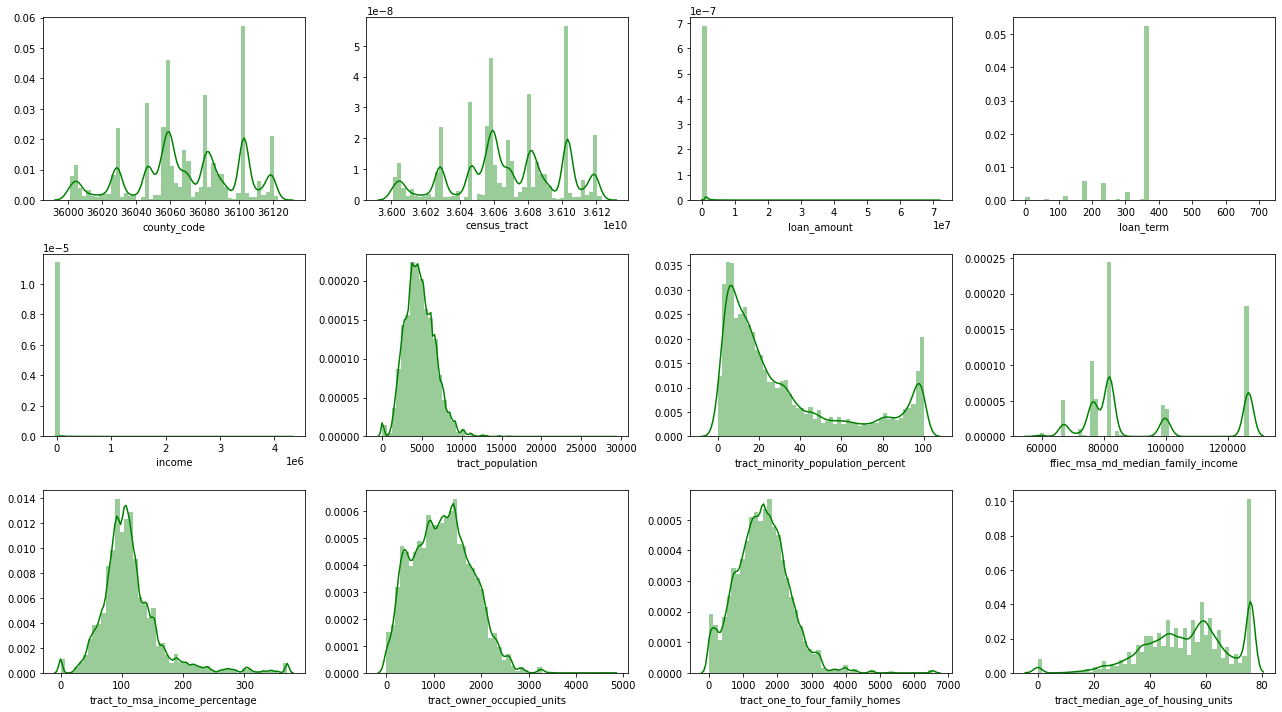

In [58]:
fig,ax=plt.subplots(nrows=3,ncols=4,figsize=(18,10))
for var,sub in zip(df_num.columns,ax.flatten()):
    sns.distplot(df[var],ax=sub,color='green')
plt.tight_layout()
plt.show()

In [59]:
df_num.skew()

county_code                          -0.27
census_tract                         -0.26
loan_amount                          54.40
loan_term                            -1.99
income                              132.69
tract_population                      0.64
tract_minority_population_percent     1.07
ffiec_msa_md_median_family_income     0.77
tract_to_msa_income_percentage        1.89
tract_owner_occupied_units            0.25
tract_one_to_four_family_homes        0.64
tract_median_age_of_housing_units    -0.57
dtype: float64

* loan_amount and income columns are very heavily skewed.
* tract_minority_population_percent,tract_to_msa_income_percentage are highly positive skewed.
* loan_term is higly negative skewed.
* tract_median_age_of_housing_units,tract_one_to_four_family_homes,tract_population,ffiec_msa_md_median_family_income are slightly skewed.
* tract_owner_occupied_units is the only column with near normal distribution.

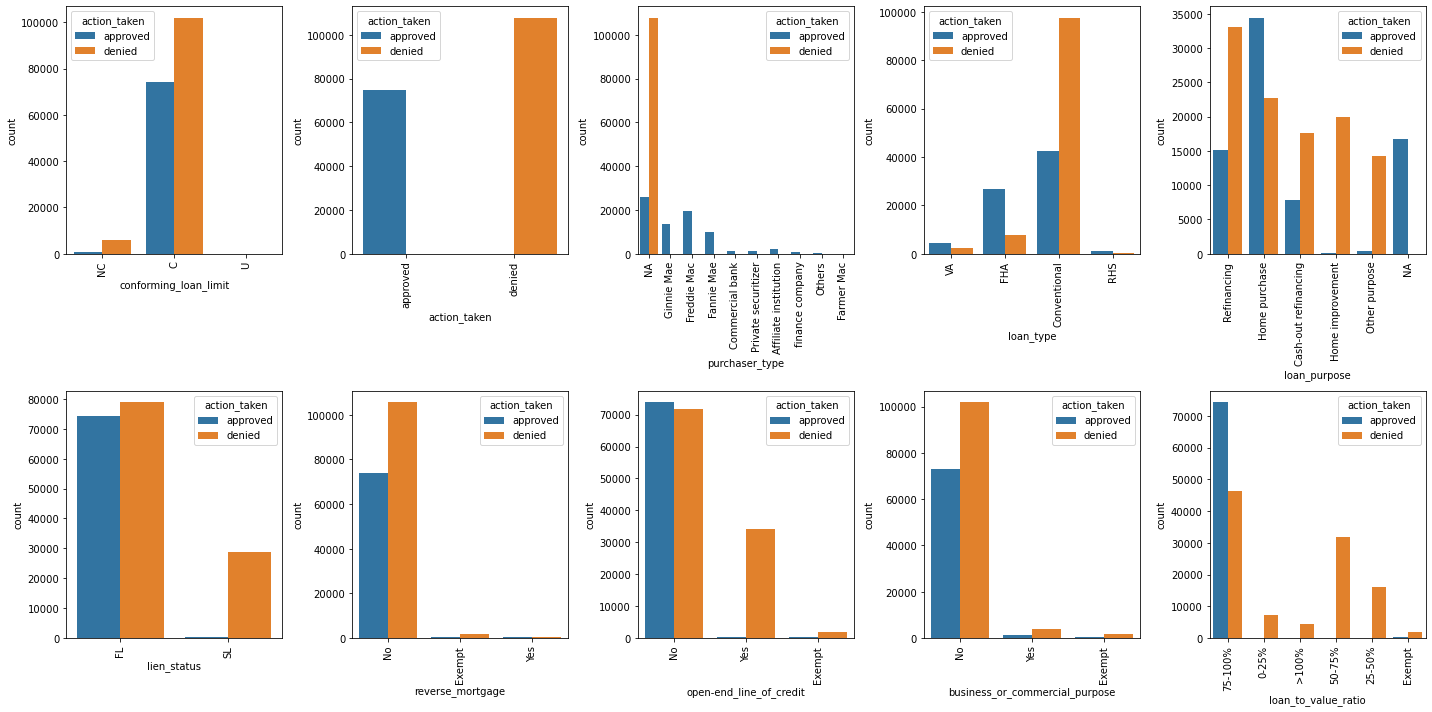

In [60]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,10))
for var,sub in zip(df_cat.columns[2:12],ax.flatten()):
    sns.countplot(df[var],hue=df['action_taken'],ax=sub)
    sub.set_xticklabels(df[var].unique(),rotation=90)
plt.tight_layout()
plt.show()

**Findings:**
* Mortgages with Non confirming loan limits(NC) are getting more rejection than Conforming(C).
* Except for the customers for whom purchaser type is not applicable all the other customers with any of the purchaser type are getting loan approval.
* Most of the Conventional loans requests are denied since,they are not insured or guaranteed by FHA, VA, RHS, or FSA.On the other hand VA,FHA,RHS are getting more loan approval than rejection.
* Loans are provided more frequently for purchasing homes or for the borrowers for whom the purpose of the loan is not necessary.
* Borrowers are most likely to get loan rejection, if they are applying for home improvement or if the purpose of the loan is not known(other purpose) properly .
* Loans are mostly getting rejected for a subordinate lien secured loan.
* Most loans requests in the data are not reverse mortgage and does not belong to open-end line of credit.
* Only Loan amounts between 75%-100% of the property value have good chance of getting loan approval whereas loan amounts with <75% or >100% of the property values are getting rejected.

In [61]:
pd.crosstab(df['purchaser_type'],df['action_taken'])

action_taken,approved,denied
purchaser_type,,
Affiliate institution,2221,0
Commercial bank,1305,0
Fannie Mae,10105,0
Farmer Mac,2,0
Freddie Mac,19370,0
Ginnie Mae,13553,0
NA,25734,107630
Others,421,0
Private securitizer,1283,0


**Purchaser_type**:
* All the denied loans fall under 'Not applicable' category.
* A customer is most likely to get loan approval,if they belong to any one of the purchaser type.

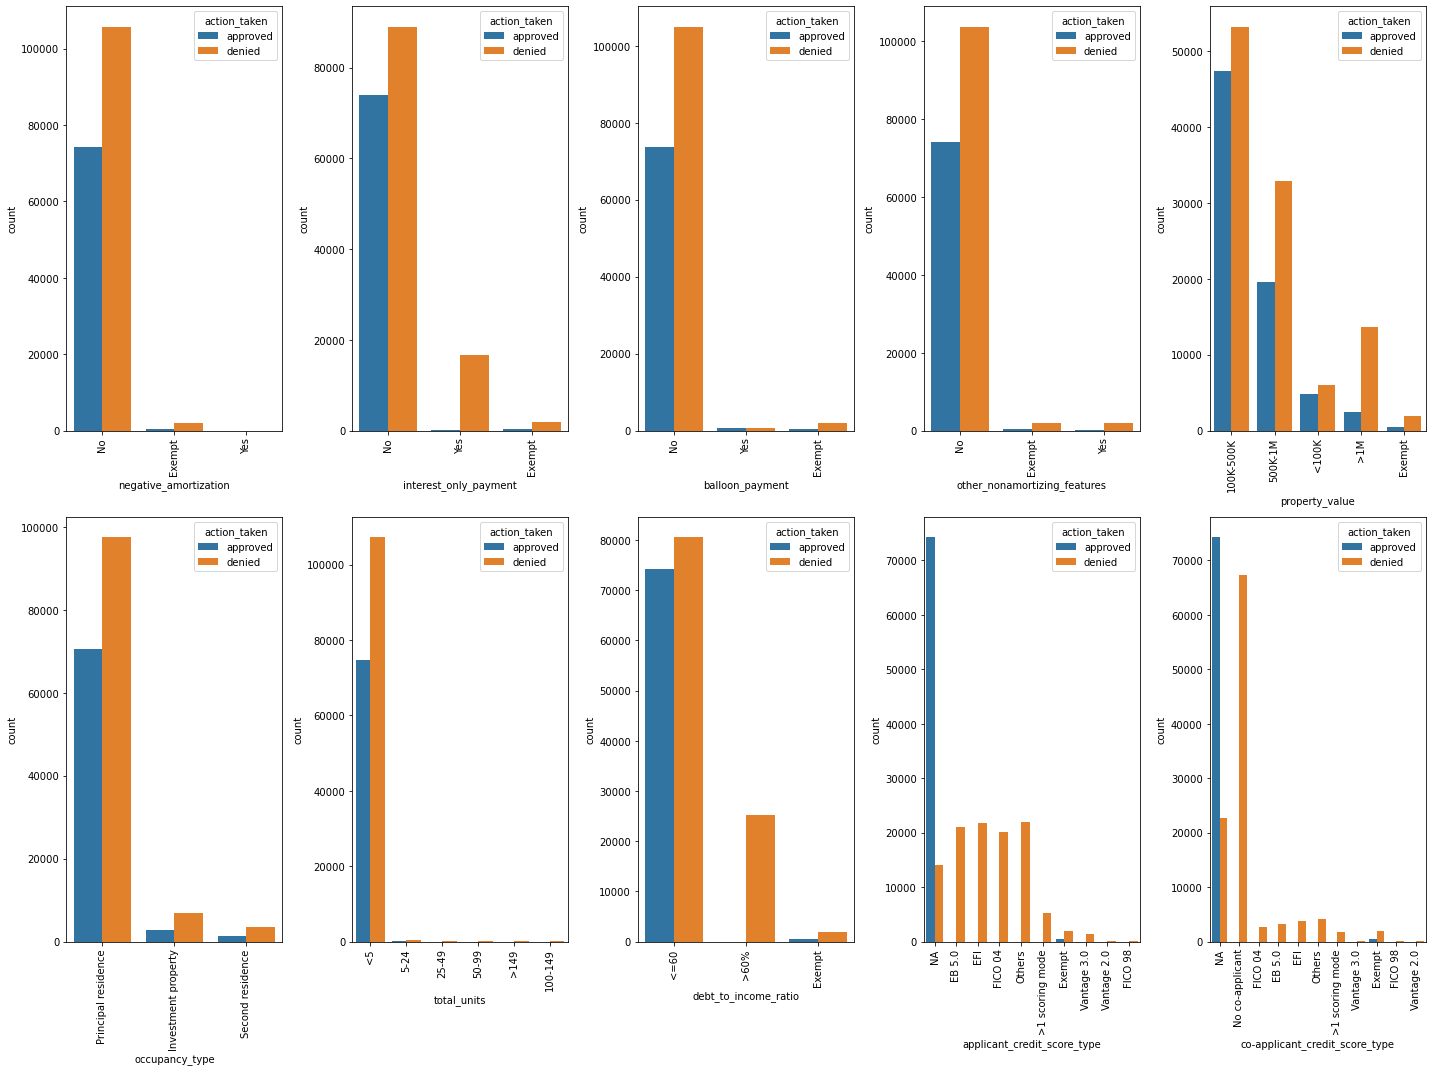

In [62]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(20,15))
for var,sub in zip(df_cat.columns[12:22],ax.flatten()):
    sns.countplot(df[var],hue=df['action_taken'],ax=sub)
    sub.set_xticklabels(df[var].unique(),rotation=90)
plt.tight_layout()
plt.show()

**Findings:**
* Properties with >1M value are also getting more rejections than approval ,which indicates that,'loan approval' is not dependant on the value of a property.
* Most dwellings are principal residence.
* Most properties have less than 5 dwelling units.
* Loans are getting rejected,if the debt of the borrower is >60% of his/her income.
* All of the credit scoring models are rejecting loans requests.Hence the borrowers are most likely to get their loan request rejected if their credit score is calculated using the credit scoring models.

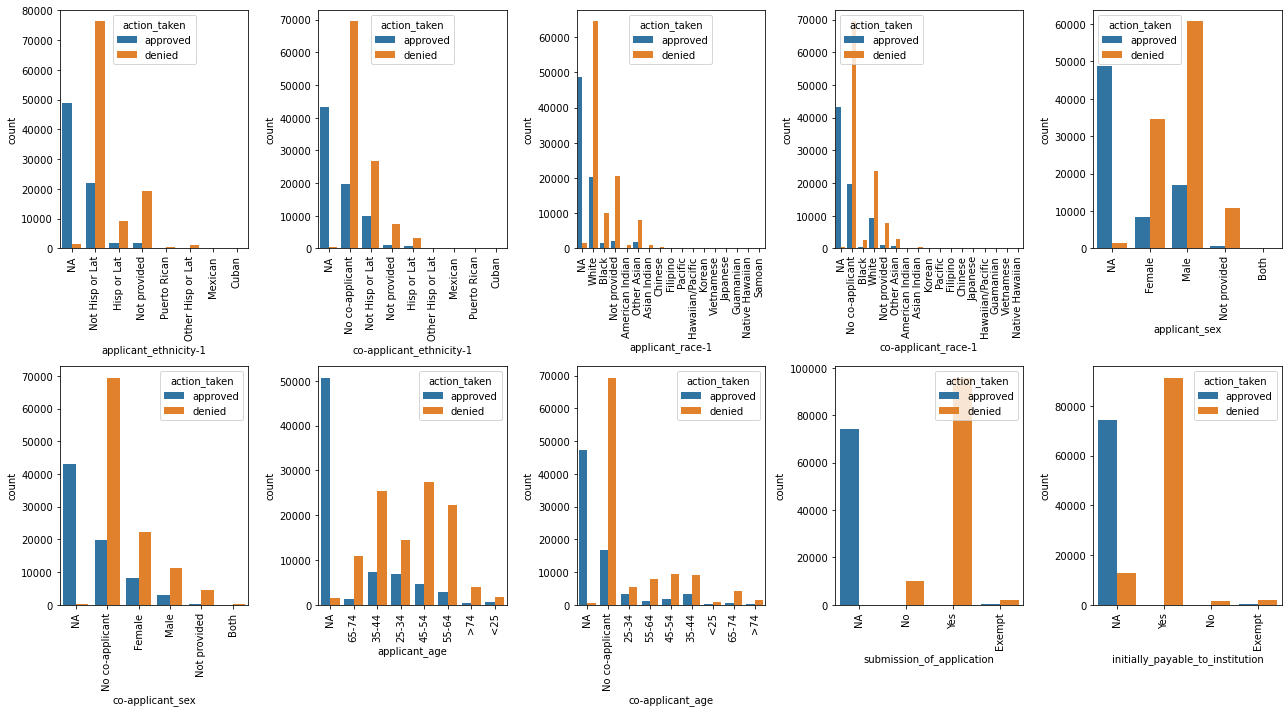

In [63]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10),squeeze=True)
for var,sub in zip(df_cat.columns[22:32],ax.flatten()):
    sns.countplot(df[var],hue=df['action_taken'],ax=sub)
    sub.set_xticklabels(df[var].unique(),rotation=90)
plt.tight_layout()
plt.show()

**Findings:**
* For ethinicity,race and age,there is a good chance for getting loan approval if none of these fields are applicable to a borrower,which means that the borrower may be an organization/company.
* Regarding discrimination,more details analysis is required.

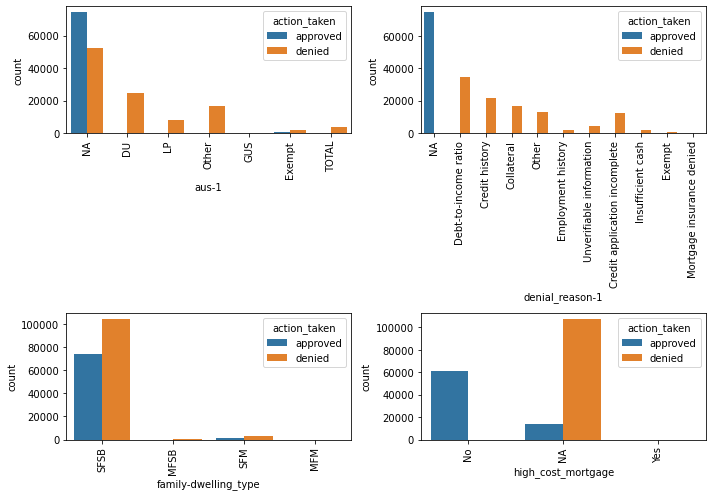

In [64]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,7),squeeze=True)
for var,sub in zip(df_cat.columns[32:],ax.flatten()):
    sns.countplot(df[var],hue=df['action_taken'],ax=sub)
    sub.set_xticklabels(df[var].unique(),rotation=90)
plt.tight_layout()
plt.show()

**Findings:**
* All the Automated Underwriting Systems are rejecting loans.
* 'Debt-to-income-ratio' is the reason for most rejections followed by 'credit history'.
* The chances of loan rejection is high for high-cost mortgage whereas low-cost mortgages are mostly approved.

## Bivariant Analysis

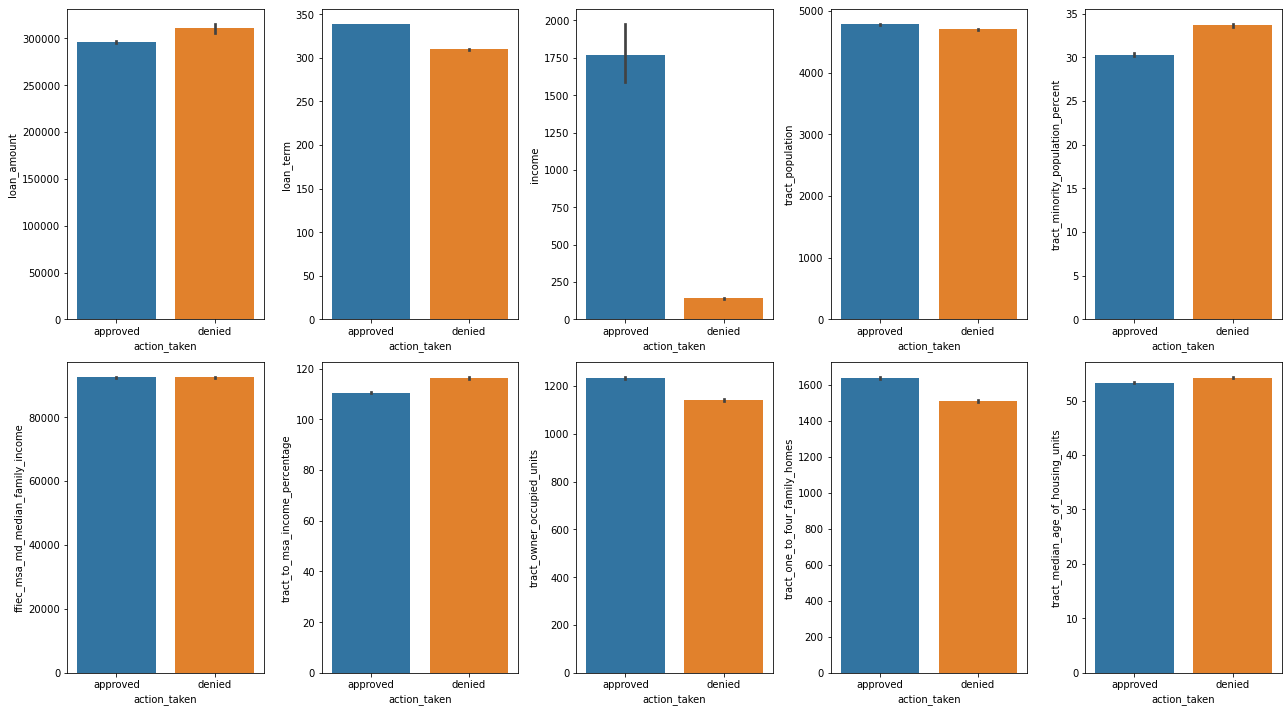

In [65]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(df_num.columns[2:],ax.flatten()):
    sns.barplot(x=df['action_taken'],y=df[var],ax=sub)
plt.tight_layout()
plt.show()

### Running Statistical tests to check the relation of features to the target

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in df_num.columns:
    print('Hypothesis:')
    print('H0: {} does not have any impact on action taken'.format(i))
    print('H1: {} has significant impact on action taken'.format(i))
    
    k= '{}~action_taken '.format(i)
    model= ols(k, data=pd.concat([df_num, df_cat['action_taken']], axis=1)).fit()
    print('')
    print('Pvalue=',model.pvalues[1])
    if model.pvalues[1] <= 0.05:
        print('Reject null hypothesis, {} has an impact on target'.format(i))
    else:
        print('Fail to reject null hypothesis, {} has no impact on target'.format(i))
    print('_'*80)
    print('')

Hypothesis:
H0: county_code does not have any impact on action taken
H1: county_code has significant impact on action taken

Pvalue= 1.7245450238736588e-36
Reject null hypothesis, county_code has an impact on target
________________________________________________________________________________

Hypothesis:
H0: census_tract does not have any impact on action taken
H1: census_tract has significant impact on action taken

Pvalue= 1.8052653872841565e-28
Reject null hypothesis, census_tract has an impact on target
________________________________________________________________________________

Hypothesis:
H0: loan_amount does not have any impact on action taken
H1: loan_amount has significant impact on action taken

Pvalue= 3.944192074405708e-06
Reject null hypothesis, loan_amount has an impact on target
________________________________________________________________________________

Hypothesis:
H0: loan_term does not have any impact on action taken
H1: loan_term has significant impact 

ffiec_msa_md_median_family_income is the only numeric column to not be statistically significant for action taken. It can be dropped for the purpose of building the model.

In [103]:
from scipy.stats import chi2_contingency

for i in df_cat.columns:
    print('Hypothesis:')
    print('H0: {} does not have any impact on action taken'.format(i))
    print('H1: {} has significant impact on action taken'.format(i))
    print('')
    cross= pd.crosstab(df_cat[i] , df_cat['action_taken'])
    pval= chi2_contingency(observed= cross)[1]
    if pval <= 0.05:
        print('Reject null hypothesis, {} has an impact on target'.format(i))
    else:
        print('Fail to reject null hypothesis, {} has no impact on target'.format(i))
    print('_'*80)
    print('')

Hypothesis:
H0: lei does not have any impact on action taken
H1: lei has significant impact on action taken

Reject null hypothesis, lei has an impact on target
________________________________________________________________________________

Hypothesis:
H0: derived_msa-md does not have any impact on action taken
H1: derived_msa-md has significant impact on action taken

Reject null hypothesis, derived_msa-md has an impact on target
________________________________________________________________________________

Hypothesis:
H0: conforming_loan_limit does not have any impact on action taken
H1: conforming_loan_limit has significant impact on action taken

Reject null hypothesis, conforming_loan_limit has an impact on target
________________________________________________________________________________

Hypothesis:
H0: action_taken does not have any impact on action taken
H1: action_taken has significant impact on action taken

Reject null hypothesis, action_taken has an impact on tar

Reject null hypothesis, co-applicant_age has an impact on target
________________________________________________________________________________

Hypothesis:
H0: submission_of_application does not have any impact on action taken
H1: submission_of_application has significant impact on action taken

Reject null hypothesis, submission_of_application has an impact on target
________________________________________________________________________________

Hypothesis:
H0: initially_payable_to_institution does not have any impact on action taken
H1: initially_payable_to_institution has significant impact on action taken

Reject null hypothesis, initially_payable_to_institution has an impact on target
________________________________________________________________________________

Hypothesis:
H0: aus-1 does not have any impact on action taken
H1: aus-1 has significant impact on action taken

Reject null hypothesis, aus-1 has an impact on target
_______________________________________________

All the categorical features that we picked for analysis have be statistically proven to be significant for the target feature. This means that our inferences to pick columns for analysis have been correct.

### Checking for multicollinearity

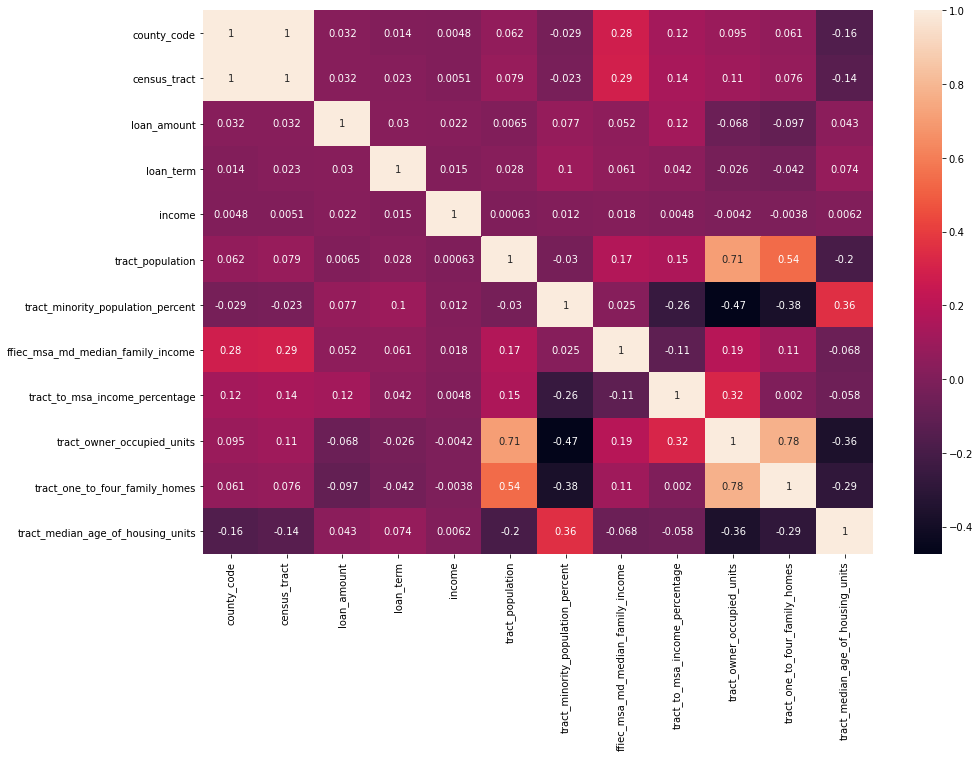

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

- Country code and census tract have a correlation of 1 which means they represent one another.
- tract one to four family homes has multicollinearity with tract population and tract owner occupies units.
- tract population also has a multicollinearity with tract owner occupies units.
- Conclusion is that tract one to four family homes, tract population and tract owner occupies units are features that are not independent from one another. We may consider developing a new column out of the 3 or consider dropping one of them.

### Checking for variability as well as outliers

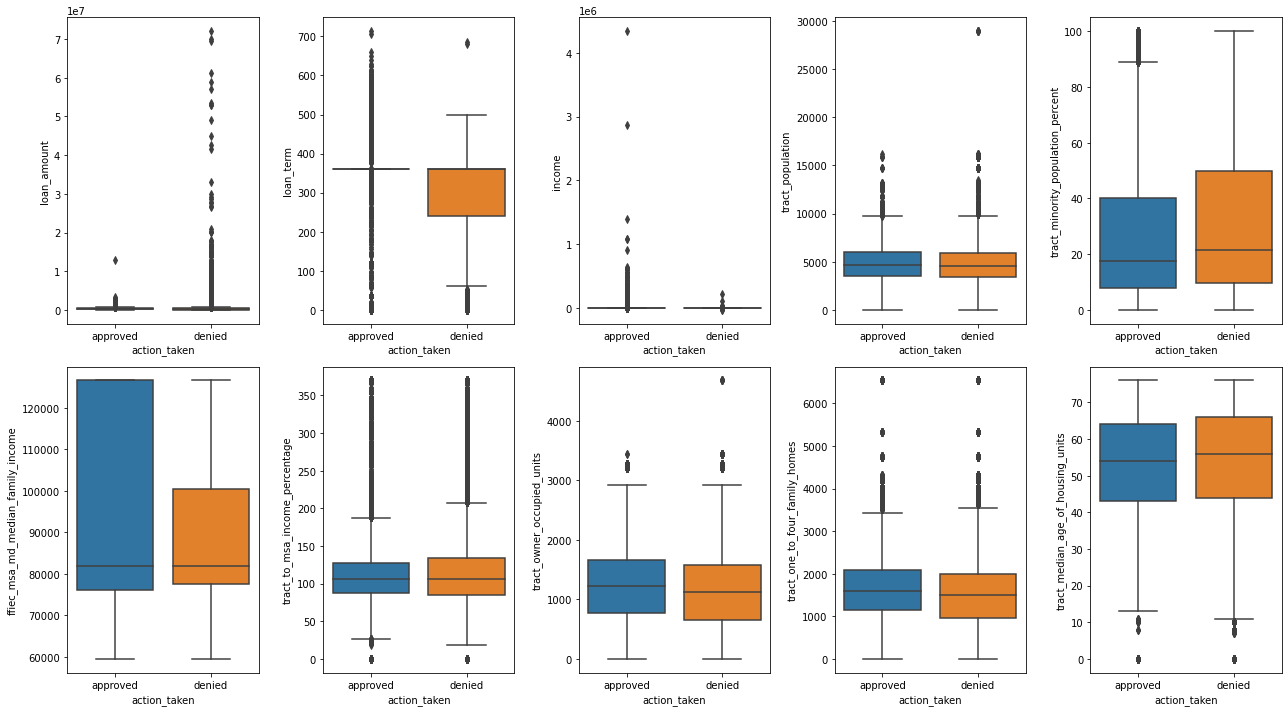

In [109]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(df_num.columns[2:],ax.flatten()):
    sns.boxplot(x=df['action_taken'],y=df[var],ax=sub)
plt.tight_layout()
plt.show()

Let us ignore the features with presence of many 0 values for better understanding.

- except ffiec_msa_md_median_family_income, all the numeric features have a good amount of outliers. It is to be decided whether such data must be capped or eliminated.
- As a best practice, to avoid data leakage, we can eliminate the top and bottom 1% of the data (trim) and then cap the rest of the outliers.
- Loan term, ffiec_msa_md_median_family_income are features that can be considered as some of the best indicators of action taken. 

### Checking for Class Imbalance

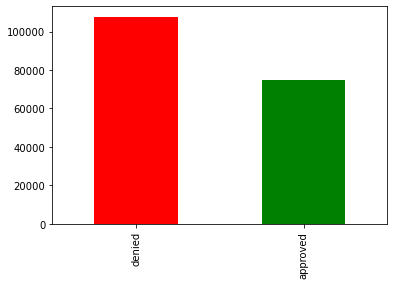

In [114]:
(df['action_taken'].value_counts()).plot(kind='bar', color=['red','green'])
plt.show()

- 'Approved' is the minority class.
- The difference is not alarming and there is no need for treatment of class imbalance.